In [2]:
import glob 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
xlsx_path = './excel/*.xlsx'
csv_path = './excel/*.csv'
path_list = list(set(glob.glob(xlsx_path)+glob.glob(xlsx_path)))
for path in path_list:
    print('##'*28)
    print(path)
    f = pd.ExcelFile(path)
    for i in f.sheet_names:
        data = pd.read_excel(path,sheet_name=i)
        a= data.describe()
        # print(a)
        print('num_null:',i,':', sum(data.isnull().values).sum())
        print('---'*18)


########################################################
./excel\test.xlsx
num_null: 企业的订货量（m³） : 1
------------------------------------------------------
num_null: A订货量 : 0
------------------------------------------------------
num_null: B订货量 : 0
------------------------------------------------------
num_null: C订货量 : 0
------------------------------------------------------
num_null: 供应商的供货量（m³） : 0
------------------------------------------------------


In [3]:
data = pd.read_excel('D://workspace//mathematical_modeling//work tree//solver//excel//test.xlsx')
data.head()

,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,NaN,0,0,43,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,S002,A,1.0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,S003,C,7.0,1,0,0,0,1,4,50,...,10,3,50,20,20,7,10,9,20,10
3,S004,B,0.0,1,1,100,0,85,0,0,...,1,0,1,0,0,0,0,1,0,0
4,S005,A,30.0,60,60,60,70,70,60,70,...,80,70,70,70,70,70,70,70,70,80


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Columns: 242 entries, 供应商ID to W240
dtypes: float64(1), int64(239), object(2)
memory usage: 760.2+ KB


In [22]:
data.describe()

,W001,W002,W003,W004,W005,W006,W007,W008,W009,W010,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
count,401.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,46.114713,48.019900,46.995025,46.564677,68.922886,45.296020,47.661692,47.597015,46.320896,47.101990,...,59.957711,89.651741,49.940299,46.925373,56.975124,46.512438,97.281095,69.435323,47.579602,52.305970
std,350.198268,414.294996,373.086439,160.874161,791.878250,267.139777,381.794189,333.394851,238.409148,231.116248,...,335.024309,1059.583447,276.940357,180.892369,249.823088,177.517829,1194.148697,677.082396,322.074750,261.794885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6390.000000,7870.000000,7020.000000,1460.000000,15680.000000,4340.000000,7218.000000,6000.000000,3600.000000,3290.000000,...,5330.000000,21010.000000,4550.000000,1480.000000,3000.000000,1610.000000,23690.000000,13080.000000,5760.000000,3610.000000


In [7]:
# 画图
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from plotly import tools, subplots
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import missingno as msno

In [ ]:
%matplotlib inline
# %matplotlib widget
plt.rcParams['font.sans-serif']=['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

f, ax=plt.subplots(figsize=(12,10))
sns.barplot(x=df["country_txt"].value_counts().head(10).index,
            y=df["country_txt"].value_counts().head(10),ax=ax)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
ax.set_xlabel("国家",fontsize=20)
ax.set_ylabel("次数",fontsize=20)

Text(0, 0.5, '国家')

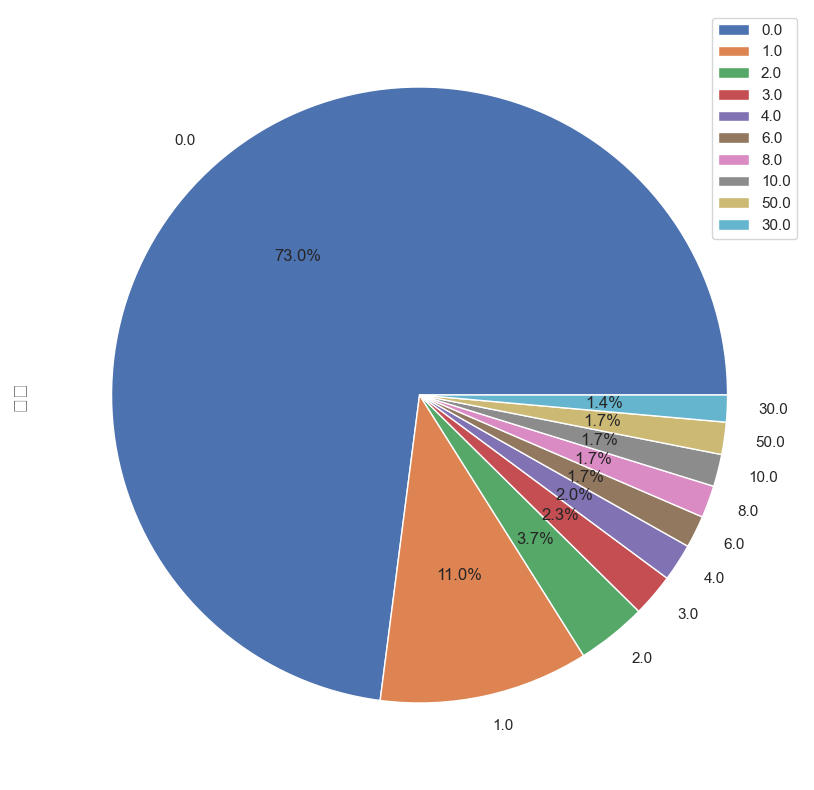

In [22]:
ax=data["W001"].value_counts().head(10).plot(kind = 'pie', 
                                               autopct='%1.1f%%', 
                                               figsize=(10, 10), 
                                               startangle=0)
ax.legend()
ax.set_ylabel("国家",fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '16.0'),
  Text(12, 0, '20.0'),
  Text(13, 0, '25.0'),
  Text(14, 0, '30.0'),
  Text(15, 0, '40.0'),
  Text(16, 0, '50.0'),
  Text(17, 0, '70.0'),
  Text(18, 0, '80.0'),
  Text(19, 0, '90.0'),
  Text(20, 0, '140.0'),
  Text(21, 0, '150.0'),
  Text(22, 0, '160.0'),
  Text(23, 0, '170.0'),
  Text(24, 0, '210.0'),
  Text(25, 0, '230.0'),
  Text(26, 0, '240.0'),
  Text(27, 0, '300.0'),
  Text(28, 0, '330.0'),
  Text(29, 0, '390.0'),
  Text(30, 0, '400.0'),
  Text(31, 0, '490.0'),
  Text(32, 0, '500.0'),
  Text(33, 0, '550.0'),
  Text(34, 0, '700.0'),
  Text(35, 0, 

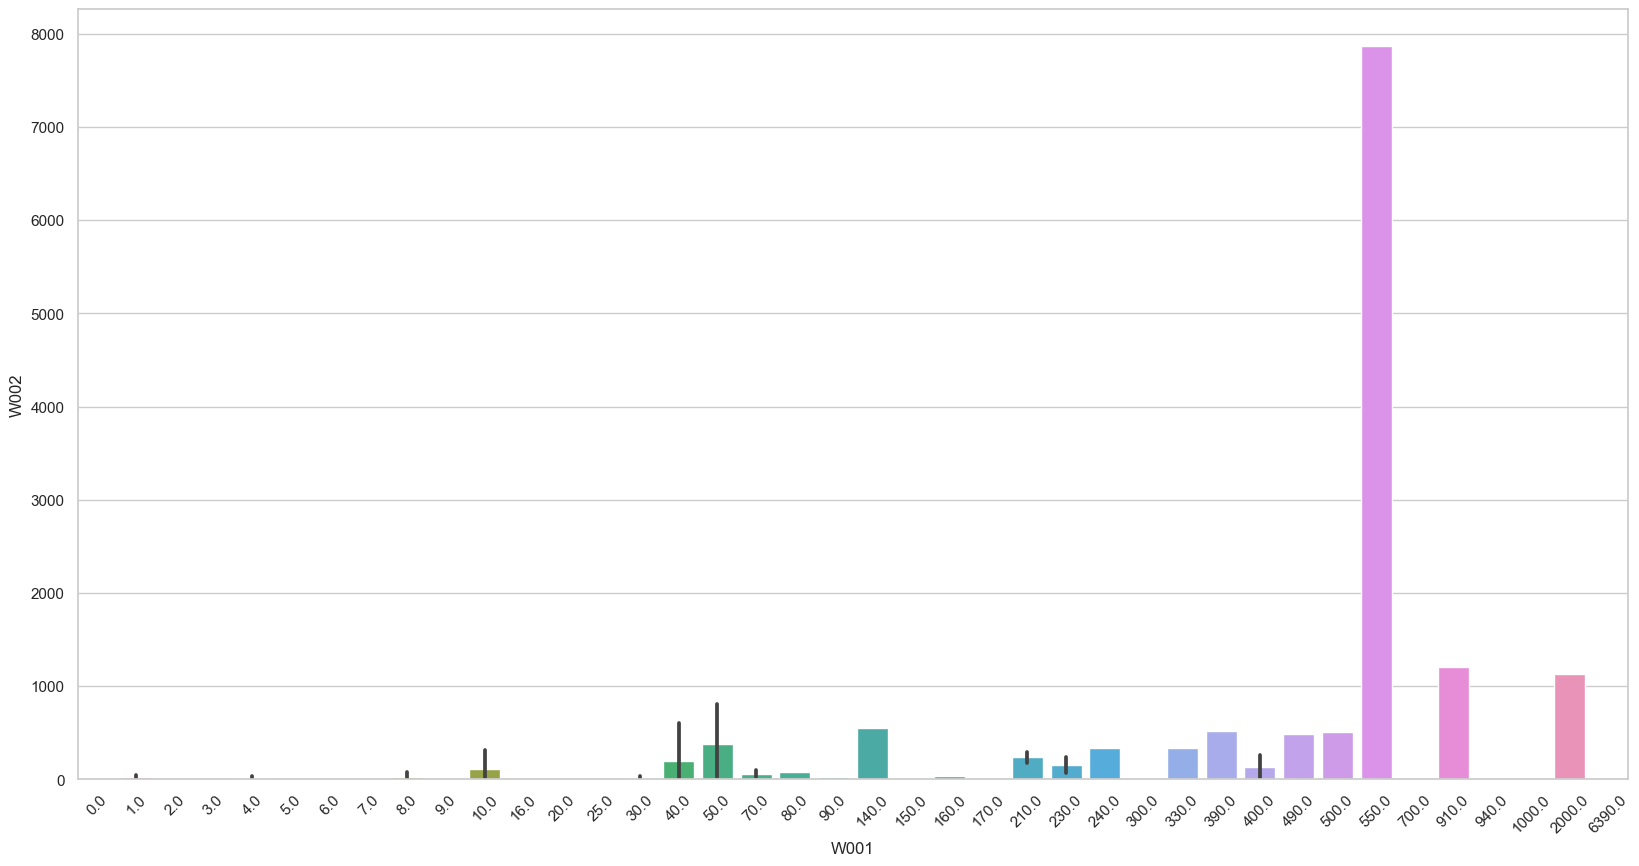

In [27]:
f, ax=plt.subplots(figsize=(20,10))
sns.barplot('W001','W002',estimator=np.mean,data=data,ax=ax)
plt.xticks(rotation=45)

In [37]:
import pandas as pd
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
df.head()

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741


In [36]:
df.groupby(['Team']).head()

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [5]:
from pandas_profiling import ProfileReport

In [11]:
data.iloc[:, :5]

,供应商ID,材料分类,W001,W002,W003
0,S001,B,NaN,0,0
1,S002,A,1.0,1,0
2,S003,C,7.0,1,0
3,S004,B,0.0,1,1
4,S005,A,30.0,60,60
...,...,...,...,...,...
397,S398,C,0.0,1,0
398,S399,B,0.0,0,1
399,S400,B,0.0,1,0
400,S401,B,0.0,0,0


In [6]:
profile = ProfileReport(data.iloc[:, :5], title="Pandas Profiling Report")

profile.to_file('report.html')
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("output.html")
sv_report = sv.analyze(df)